## Assignment 1 Euler-Bernoulli's beam

In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker

x, L, q0, P, E, I = symbols('x L q0 P E I')

w = Function('w')(x) # w is a function of x

diffeq1 = Eq(E*I * diff(w, x, 4), q0)

w = dsolve(diffeq1, w).rhs

M = -E*I*w.diff(x, 2)

#C1, C2, C3, C4 = symbols('C1 C2 C3 C4')

# Boundary conditions for distributed load
boundary_conditions1 = [ w.subs(x, 0),                      #w(0) = 0
                        w.diff(x).subs(x, 0),                 #w'(0) = 0
                        M.subs(x, L),                       #w''(L) = 0
                        w.diff(x,3).subs(x, L) - P/(-E*I)]      #w'''(L) = -P

integration_constants = solve(boundary_conditions1, 'C1, C2, C3, C4', real=True)

display(integration_constants)

solution = w.subs(integration_constants)

display(simplify(solution))

w_func = lambdify((x, L, q0, P, E, I), solution, 'numpy')

# Create moment function with constants substituted
M_solution = M.subs(integration_constants)
M_func = lambdify((x, L, q0, P, E, I), M_solution, 'numpy')

# Yield strength for steel (typical value)
sigma_yield = 550e6  # 250 MPa for mild steel

# Numerical values
L1 = 3; L2 = 0.3

L=L1
E=220e9
b=h=0.05
I = b*h**3/12; #moment of inertia
rho = 7800; #density
g = 9.81
m = 130
P = -m*g
poisson = 0.3
q0 = -h*b*rho*g

x_vals = np.linspace(0, L, 200)
w_vals = w_func(x_vals, L, q0, P, E, I)

# Compute stresses at z = -h/2 (bottom surface)
z = -h/2
M_vals = M_func(x_vals, L, q0, P, E, I)
sigma_xx = -M_vals * z / I  # Normal stress from bending
sigma_vM = np.abs(sigma_xx)  # von Mises stress (simplified for uniaxial state)

# Find maximum stresses
max_sigma_xx = np.max(np.abs(sigma_xx))
max_sigma_vM = np.max(sigma_vM)
max_stress_location = x_vals[np.argmax(sigma_vM)]
safety_factor = sigma_yield / max_sigma_vM
will_yield = max_sigma_vM > sigma_yield

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Deflection
ax1.plot(x_vals, w_vals*1e3, 'b-', linewidth=2)
ax1.set_title(f'Beam Deflection at L={L}m', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position along beam (m)', fontsize=12)
ax1.set_ylabel('Deflection (mm)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax1.set_xlim(0, L)

# Plot 2: Normal stress σ_xx
ax2.plot(x_vals, sigma_xx/1e6, 'r-', linewidth=2)
ax2.set_title('Normal Stress σ_xx at z=-h/2 (bottom surface)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Position along beam (m)', fontsize=12)
ax2.set_ylabel('Normal Stress (MPa)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.axhline(sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--', label=f'Yield strength = {sigma_yield/1e6:.0f} MPa')
ax2.axhline(-sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--')
ax2.set_xlim(0, L)
ax2.legend()

# Plot 3: von Mises stress
ax3.plot(x_vals, sigma_vM/1e6, 'g-', linewidth=2)
ax3.set_title('von Mises Effective Stress σ_vM at z=-h/2', fontsize=14, fontweight='bold')
ax3.set_xlabel('Position along beam (m)', fontsize=12)
ax3.set_ylabel('von Mises Stress (MPa)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.axhline(sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--', label=f'Yield strength = {sigma_yield/1e6:.0f} MPa')
ax3.set_xlim(0, L)
ax3.legend()

plt.tight_layout()
plt.show()

# Print results
print(f"\n{'='*70}")
print(f"STRESS ANALYSIS RESULTS FOR L={L}m")
print(f"{'='*70}")
print(f"Beam properties:")
print(f"  Length: {L} m")
print(f"  Cross-section: {b*1e3:.1f} mm × {h*1e3:.1f} mm")
print(f"  Material: Steel (E = {E/1e9:.0f} GPa, σ_yield = {sigma_yield/1e6:.0f} MPa)")
print(f"\nLoading:")
print(f"  Distributed load q₀: {q0:.2f} N/m")
print(f"  Point load P: {P:.2f} N (at free end)")
print(f"\nStress at z = -h/2 (bottom surface, maximum tension):")
print(f"  Maximum |σ_xx|: {max_sigma_xx/1e6:.2f} MPa")
print(f"  Maximum σ_vM: {max_sigma_vM/1e6:.2f} MPa")
print(f"  Location of max stress: x = {max_stress_location:.3f} m")
print(f"\nYield assessment (von Mises criterion):")
print(f"  Yield strength: {sigma_yield/1e6:.0f} MPa")
print(f"  Safety factor: {safety_factor:.2f}")
if will_yield:
    print(f"  ⚠️  BEAM WILL YIELD - Maximum stress exceeds yield strength!")
else:
    print(f"  ✓  Beam is safe - No yielding expected")
print(f"{'='*70}\n")

L=L2

x_vals = np.linspace(0, L, 200)
w_vals = w_func(x_vals, L, q0, P, E, I)

# Compute stresses at z = -h/2 (bottom surface)
z = -h/2
M_vals = M_func(x_vals, L, q0, P, E, I)
sigma_xx = -M_vals * z / I  # Normal stress from bending
sigma_vM = np.abs(sigma_xx)  # von Mises stress (simplified for uniaxial state)

# Find maximum stresses
max_sigma_xx = np.max(np.abs(sigma_xx))
max_sigma_vM = np.max(sigma_vM)
max_stress_location = x_vals[np.argmax(sigma_vM)]
safety_factor = sigma_yield / max_sigma_vM
will_yield = max_sigma_vM > sigma_yield

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Deflection
ax1.plot(x_vals, w_vals*1e3, 'b-', linewidth=2)
ax1.set_title(f'Beam Deflection at L={L}m', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position along beam (m)', fontsize=12)
ax1.set_ylabel('Deflection (mm)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax1.set_xlim(0, L)

# Plot 2: Normal stress σ_xx
ax2.plot(x_vals, sigma_xx/1e6, 'r-', linewidth=2)
ax2.set_title('Normal Stress σ_xx at z=-h/2 (bottom surface)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Position along beam (m)', fontsize=12)
ax2.set_ylabel('Normal Stress (MPa)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.axhline(sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--', label=f'Yield strength = {sigma_yield/1e6:.0f} MPa')
ax2.axhline(-sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--')
ax2.set_xlim(0, L)
ax2.legend()

# Plot 3: von Mises stress
ax3.plot(x_vals, sigma_vM/1e6, 'g-', linewidth=2)
ax3.set_title('von Mises Effective Stress σ_vM at z=-h/2', fontsize=14, fontweight='bold')
ax3.set_xlabel('Position along beam (m)', fontsize=12)
ax3.set_ylabel('von Mises Stress (MPa)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.axhline(sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--', label=f'Yield strength = {sigma_yield/1e6:.0f} MPa')
ax3.set_xlim(0, L)
ax3.legend()

plt.tight_layout()
plt.show()

# Print results
print(f"\n{'='*70}")
print(f"STRESS ANALYSIS RESULTS FOR L={L}m")
print(f"{'='*70}")
print(f"Beam properties:")
print(f"  Length: {L} m")
print(f"  Cross-section: {b*1e3:.1f} mm × {h*1e3:.1f} mm")
print(f"  Material: Steel (E = {E/1e9:.0f} GPa, σ_yield = {sigma_yield/1e6:.0f} MPa)")
print(f"\nLoading:")
print(f"  Distributed load q₀: {q0:.2f} N/m")
print(f"  Point load P: {P:.2f} N (at free end)")
print(f"\nStress at z = -h/2 (bottom surface, maximum tension):")
print(f"  Maximum |σ_xx|: {max_sigma_xx/1e6:.2f} MPa")
print(f"  Maximum σ_vM: {max_sigma_vM/1e6:.2f} MPa")
print(f"  Location of max stress: x = {max_stress_location:.3f} m")
print(f"\nYield assessment (von Mises criterion):")
print(f"  Yield strength: {sigma_yield/1e6:.0f} MPa")
print(f"  Safety factor: {safety_factor:.2f}")
if will_yield:
    print(f"  ⚠️  BEAM WILL YIELD - Maximum stress exceeds yield strength!")
else:
    print(f"  ✓  Beam is safe - No yielding expected")
print(f"{'='*70}\n")

## Timoshenko beam theory

In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

#############
# Poiint load

x, q0, E, I, Ks, G, A, L, P = symbols('x q0 E I Ks G A L P', real=True)

f_phi = Function('phi') # phi is a function of x

## Define the differential equation in terms of phi
diffeq_phi = Eq(E*I*f_phi(x).diff(x, 3), q0)

## Solve the differential equation for phi(x) (eq. 3.35 LN)
phi = dsolve(diffeq_phi, f_phi(x)).rhs

## Solve the differential equation for w(x) (eq. 3.36 LN)
w = Function('w') # w is a function of x
diffeq_w = Eq(w(x).diff(x), -E*I/(G*Ks*A)*phi.diff(x,2) + phi)
w        = dsolve(diffeq_w, w(x)).rhs

## Define boundary conditions
M = -E*I*phi.diff(x)
# Boundary conditions for distributed load
boundary_conditions = [ w.subs(x, 0),                      #w(0) = 0
                        w.diff(x).subs(x, 0),                 #w'(0) = 0
                        M.subs(x, L),                       #w''(L) = 0
                        w.diff(x,3).subs(x, L) - P/(-E*I)]      #w'''(L) = -P

## Solve for the integration constants
integration_constants = solve(boundary_conditions, 'C1, C2, C3, C4', real=True)

## Substitute the integration constants into the solution
solution1 = w.subs(integration_constants)

display(solution1)

w_func = lambdify((x, L, q0, P, E, I, Ks, A, G), solution1, 'numpy')
# Create moment function with constants substituted
M_solution = M.subs(integration_constants)
M_func = lambdify((x, L, q0, P, E, I, Ks, A, G), M_solution, 'numpy')

# Yield strength for steel (typical value)
sigma_yield = 550e6  # 250 MPa for mild steel

# Numerical values
L1 = 3; L2 = 0.3

L=L1
E=220e9
b=h=0.05
I = b*h**3/12; #moment of inertia
rho = 7800; #density
g = 9.81
m = 130
P = -m*g
poisson = 0.3
q0 = -h*b*rho*g
Ks = 5/6
A = b*h
G = E/(2*(1+poisson)) 


x_vals = np.linspace(0, L, 200)
w_vals = w_func(x_vals, L, q0, P, E, I, A, G, Ks)

# Compute stresses at z = -h/2 (bottom surface)
z = -h/2
M_vals = M_func(x_vals, L, q0, P, E, I, A, G, Ks)
sigma_xx = -M_vals * z / I  # Normal stress from bending
sigma_vM = np.abs(sigma_xx)  # von Mises stress (simplified for uniaxial state)

# Find maximum stresses
max_sigma_xx = np.max(np.abs(sigma_xx))
max_sigma_vM = np.max(sigma_vM)
max_stress_location = x_vals[np.argmax(sigma_vM)]
safety_factor = sigma_yield / max_sigma_vM
will_yield = max_sigma_vM > sigma_yield

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Deflection
ax1.plot(x_vals, w_vals*1e3, 'b-', linewidth=2)
ax1.set_title(f'Beam Deflection at L={L}m (Timoshenko)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position along beam (m)', fontsize=12)
ax1.set_ylabel('Deflection (mm)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax1.set_xlim(0, L)

# Plot 2: Normal stress σ_xx
ax2.plot(x_vals, sigma_xx/1e6, 'r-', linewidth=2)
ax2.set_title('Normal Stress σ_xx at z=-h/2 (bottom surface)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Position along beam (m)', fontsize=12)
ax2.set_ylabel('Normal Stress (MPa)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.axhline(sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--', label=f'Yield strength = {sigma_yield/1e6:.0f} MPa')
ax2.axhline(-sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--')
ax2.set_xlim(0, L)
ax2.legend()

# Plot 3: von Mises stress
ax3.plot(x_vals, sigma_vM/1e6, 'g-', linewidth=2)
ax3.set_title('von Mises Effective Stress σ_vM at z=-h/2', fontsize=14, fontweight='bold')
ax3.set_xlabel('Position along beam (m)', fontsize=12)
ax3.set_ylabel('von Mises Stress (MPa)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.axhline(sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--', label=f'Yield strength = {sigma_yield/1e6:.0f} MPa')
ax3.set_xlim(0, L)
ax3.legend()

plt.tight_layout()
plt.show()

# Print results
print(f"\n{'='*70}")
print(f"STRESS ANALYSIS RESULTS FOR L={L}m (Timoshenko Beam Theory)")
print(f"{'='*70}")
print(f"Beam properties:")
print(f"  Length: {L} m")
print(f"  Cross-section: {b*1e3:.1f} mm × {h*1e3:.1f} mm")
print(f"  Material: Steel (E = {E/1e9:.0f} GPa, G = {G/1e9:.1f} GPa)")
print(f"  Shear correction factor Ks: {Ks:.3f}")
print(f"  Yield strength: {sigma_yield/1e6:.0f} MPa")
print(f"\nLoading:")
print(f"  Distributed load q₀: {q0:.2f} N/m")
print(f"  Point load P: {P:.2f} N (at free end)")
print(f"\nStress at z = -h/2 (bottom surface, maximum tension):")
print(f"  Maximum |σ_xx|: {max_sigma_xx/1e6:.2f} MPa")
print(f"  Maximum σ_vM: {max_sigma_vM/1e6:.2f} MPa")
print(f"  Location of max stress: x = {max_stress_location:.3f} m")
print(f"\nYield assessment (von Mises criterion):")
print(f"  Safety factor: {safety_factor:.2f}")
if will_yield:
    print(f"  ⚠️  BEAM WILL YIELD - Maximum stress exceeds yield strength!")
else:
    print(f"  ✓  Beam is safe - No yielding expected")
print(f"{'='*70}\n")

L=L2

x_vals = np.linspace(0, L, 200)
w_vals = w_func(x_vals, L, q0, P, E, I, A, G, Ks)

# Compute stresses at z = -h/2 (bottom surface)
z = -h/2
M_vals = M_func(x_vals, L, q0, P, E, I, A, G, Ks)
sigma_xx = -M_vals * z / I  # Normal stress from bending
sigma_vM = np.abs(sigma_xx)  # von Mises stress (simplified for uniaxial state)

# Find maximum stresses
max_sigma_xx = np.max(np.abs(sigma_xx))
max_sigma_vM = np.max(sigma_vM)
max_stress_location = x_vals[np.argmax(sigma_vM)]
safety_factor = sigma_yield / max_sigma_vM
will_yield = max_sigma_vM > sigma_yield

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot 1: Deflection
ax1.plot(x_vals, w_vals*1e3, 'b-', linewidth=2)
ax1.set_title(f'Beam Deflection at L={L}m (Timoshenko)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Position along beam (m)', fontsize=12)
ax1.set_ylabel('Deflection (mm)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax1.set_xlim(0, L)

# Plot 2: Normal stress σ_xx
ax2.plot(x_vals, sigma_xx/1e6, 'r-', linewidth=2)
ax2.set_title('Normal Stress σ_xx at z=-h/2 (bottom surface)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Position along beam (m)', fontsize=12)
ax2.set_ylabel('Normal Stress (MPa)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.axhline(sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--', label=f'Yield strength = {sigma_yield/1e6:.0f} MPa')
ax2.axhline(-sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--')
ax2.set_xlim(0, L)
ax2.legend()

# Plot 3: von Mises stress
ax3.plot(x_vals, sigma_vM/1e6, 'g-', linewidth=2)
ax3.set_title('von Mises Effective Stress σ_vM at z=-h/2', fontsize=14, fontweight='bold')
ax3.set_xlabel('Position along beam (m)', fontsize=12)
ax3.set_ylabel('von Mises Stress (MPa)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.axhline(sigma_yield/1e6, color='orange', linewidth=1.5, linestyle='--', label=f'Yield strength = {sigma_yield/1e6:.0f} MPa')
ax3.set_xlim(0, L)
ax3.legend()

plt.tight_layout()
plt.show()

# Print results
print(f"\n{'='*70}")
print(f"STRESS ANALYSIS RESULTS FOR L={L}m (Timoshenko Beam Theory)")
print(f"{'='*70}")
print(f"Beam properties:")
print(f"  Length: {L} m")
print(f"  Cross-section: {b*1e3:.1f} mm × {h*1e3:.1f} mm")
print(f"  Material: Steel (E = {E/1e9:.0f} GPa, G = {G/1e9:.1f} GPa)")
print(f"  Shear correction factor Ks: {Ks:.3f}")
print(f"  Yield strength: {sigma_yield/1e6:.0f} MPa")
print(f"\nLoading:")
print(f"  Distributed load q₀: {q0:.2f} N/m")
print(f"  Point load P: {P:.2f} N (at free end)")
print(f"\nStress at z = -h/2 (bottom surface, maximum tension):")
print(f"  Maximum |σ_xx|: {max_sigma_xx/1e6:.2f} MPa")
print(f"  Maximum σ_vM: {max_sigma_vM/1e6:.2f} MPa")
print(f"  Location of max stress: x = {max_stress_location:.3f} m")
print(f"\nYield assessment (von Mises criterion):")
print(f"  Safety factor: {safety_factor:.2f}")
if will_yield:
    print(f"  ⚠️  BEAM WILL YIELD - Maximum stress exceeds yield strength!")
else:
    print(f"  ✓  Beam is safe - No yielding expected")
print(f"{'='*70}\n")

## Problem 1 calfem

In [ ]:
from quadmesh import *
import numpy as np
import calfem.core as cfc
import calfem.vis_mpl as cfv

# Geometry
L1 = 3.0
L2 = 0.3
h = b = 0.05

# Material data
E = 220e9
poisson = 0.3
ptype = 1  # plane stress
ep = [ptype, b]  # [ptype, thickness]
Dmat = cfc.hooke(ptype, E, poisson)

# Physical properties
rho = 7800  # density
g = 9.81
m = 130
A = b * h

# Forces
P = -m * g  # Point load (downward, negative y-direction)
q0 = -h * b * rho * g  # Distributed load per unit length (downward)

# Create mesh
p1 = np.array([0., 0.])  # Lower left corner
p2 = np.array([L1, h])   # Upper right corner
nelx = 20
nely = 4
ndof_per_node = 2
nnode = (nelx + 1) * (nely + 1)
nDofs = ndof_per_node * nnode

# Create and plot rectangular mesh using quadmesh.py 

height = h
thickness = b

p1 = np.array([0., 0.]) # Lower left corner
p2 = np.array([L1, height]) # Upper right corner

nelx = 20; nely = 4 # Number of elements in x and y direction

ndof_per_node = 2 # Number of dofs per node
nnode = (nelx+1) * (nely+1) # Number of nodes
nDofs = ndof_per_node * nnode # Number of degrees of freedom

eq = [0, -q0]


# Generating mesh

Ex, Ey, Edof, B1, B2, B3, B4, P1, P2, P3, P4 = quadmesh(p1, p2, nelx, nely, ndof_per_node)
cfv.eldraw2(Ex, Ey) # Plotting the mesh

#display(Edof)
#display("Ex", Ex)

## Initializing boundary condition vectors

bc = np.array([], 'i')
bc_val = np.array([], 'f')
bc = B4
bcval = 0. * np.ones(np.size(bc))

display(bc)

# Initializing empty stiffness matrix
K = np.zeros([nDofs, nDofs])
f = np.zeros((nDofs, 1))

for eltopo, elx, ely, in zip(Edof, Ex, Ey):
    Ke = cfc.planqe(elx, ely, ep, Dmat)
    cfc.assem(eltopo, K, Ke)

top_elements = range(nelx * (nely - 1), nelx * nely)

for el_idx in top_elements:
    # Get element coordinates
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    
    # Get element topology
    eltopo = Edof[el_idx, :]
    
    # For a quad element, the top edge connects nodes at indices 2 and 3
    # Calculate edge length
    edge_length = np.sqrt((elx[2] - elx[3])**2 + (ely[2] - ely[3])**2)
    
    # Equivalent nodal forces for uniform distributed load
    # For a uniformly distributed load q over length L:
    # Each node gets q*L/2
    nodal_force = q0 * edge_length / 2.0
    
    # Apply to the y-DOFs of nodes 3 and 4 (indices 4,5,6,7 in eltopo)
    # Node 3 (top-right): eltopo[4] = x-dof, eltopo[5] = y-dof
    # Node 4 (top-left): eltopo[6] = x-dof, eltopo[7] = y-dof
    f[eltopo[5] - 1] += nodal_force  # y-DOF of node 3 (0-indexed)
    f[eltopo[7] - 1] += nodal_force  # y-DOF of node 4 (0-indexed)

# Apply point load P at top right corner (P3)
# P3 contains the DOFs of the top-right corner node
f[P3[1] - 1] += P  # y-direction DOF (subtract 1 for 0-indexing)

print(f"Total distributed load: {q0 * L1:.2f} N")
print(f"Point load: {P:.2f} N")
print(f"Total load: {q0 * L1 + P:.2f} N")

# Apply boundary conditions - fixed left edge (B4)
bc = B4
bcval = np.zeros(np.size(bc))

# Solve the system
a, r = cfc.solveq(K, f, bc, bcval)

# Extract displacements
print(f"\nMaximum displacement: {np.min(a):.6e} m")
print(f"Maximum displacement (mm): {np.min(a)*1000:.4f} mm")






In [ ]:
for eltopo, elx, ely, in zip(Edof, Ex, Ey):
    Ke = cfc.planqe(elx, ely, ep, Dmat)
    fe = 
    cfc.assem(eltopo, K, Ke)

f[-1] += F

a, 

## Calfem with length 3m actual

'Ex'

array([[0.  , 0.15, 0.15, 0.  ],
       [0.15, 0.3 , 0.3 , 0.15],
       [0.3 , 0.45, 0.45, 0.3 ],
       [0.45, 0.6 , 0.6 , 0.45],
       [0.6 , 0.75, 0.75, 0.6 ],
       [0.75, 0.9 , 0.9 , 0.75],
       [0.9 , 1.05, 1.05, 0.9 ],
       [1.05, 1.2 , 1.2 , 1.05],
       [1.2 , 1.35, 1.35, 1.2 ],
       [1.35, 1.5 , 1.5 , 1.35],
       [1.5 , 1.65, 1.65, 1.5 ],
       [1.65, 1.8 , 1.8 , 1.65],
       [1.8 , 1.95, 1.95, 1.8 ],
       [1.95, 2.1 , 2.1 , 1.95],
       [2.1 , 2.25, 2.25, 2.1 ],
       [2.25, 2.4 , 2.4 , 2.25],
       [2.4 , 2.55, 2.55, 2.4 ],
       [2.55, 2.7 , 2.7 , 2.55],
       [2.7 , 2.85, 2.85, 2.7 ],
       [2.85, 3.  , 3.  , 2.85],
       [0.  , 0.15, 0.15, 0.  ],
       [0.15, 0.3 , 0.3 , 0.15],
       [0.3 , 0.45, 0.45, 0.3 ],
       [0.45, 0.6 , 0.6 , 0.45],
       [0.6 , 0.75, 0.75, 0.6 ],
       [0.75, 0.9 , 0.9 , 0.75],
       [0.9 , 1.05, 1.05, 0.9 ],
       [1.05, 1.2 , 1.2 , 1.05],
       [1.2 , 1.35, 1.35, 1.2 ],
       [1.35, 1.5 , 1.5 , 1.35],
       [1.

'Ey'

array([[0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.0125, 0.0125, 0.025 , 0.025 ],
       [0.0125, 0.0125, 0.025 , 0.025 ],
       [0.0125, 0.0125, 0.025 , 0.025 ],
       [0.0125, 0.0125, 0.025 , 0.025 ],
       [0.0125, 

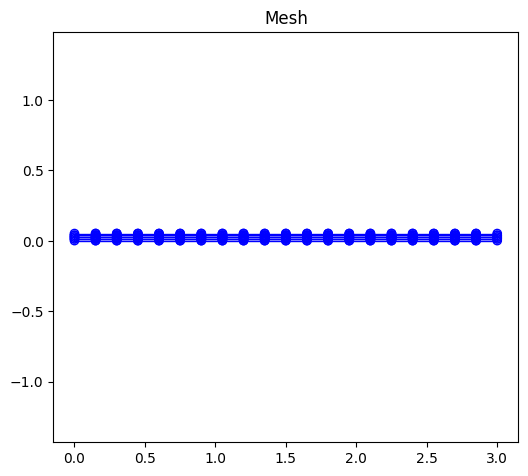

array([ 41,  42,  83,  84, 125, 126, 167, 168, 209, 210], dtype=int32)

Total distributed load: -573.89 N
Point load: -1275.30 N
Total load: -1849.18 N

Maximum displacement: -1.891191e-02 m
Maximum displacement (mm): -18.9119 mm


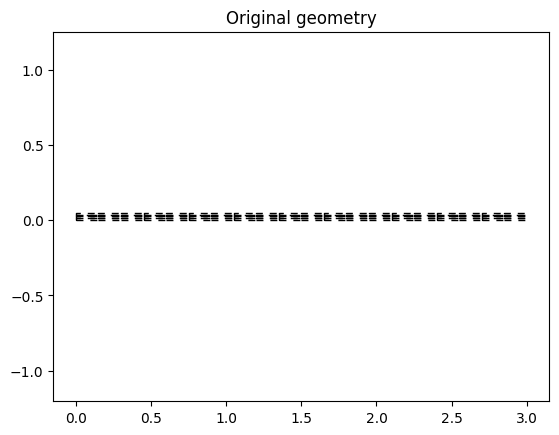

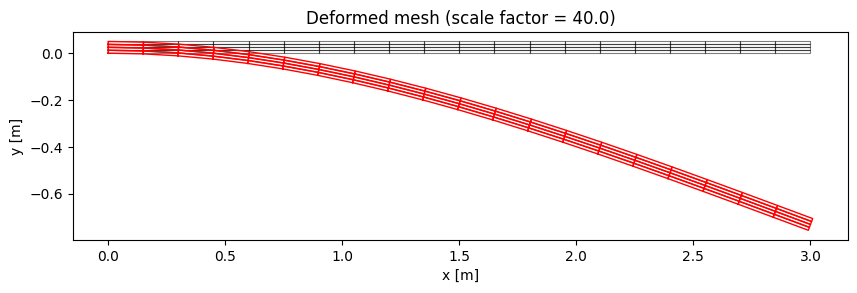

In [46]:
from quadmesh import *
import numpy as np
import calfem.core as cfc
import calfem.vis_mpl as cfv
import matplotlib.pyplot as plt
# Geometry
L1 = 3.0
L2 = 0.3
h = b = 0.05

# Material data
E = 220e9
poisson = 0.3
ptype = 1  # plane stress
ep = [ptype, b]  # [ptype, thickness]
Dmat = cfc.hooke(ptype, E, poisson)

# Physical properties
rho = 7800  # density
g = 9.81
m = 130
A = b * h

# Forces
P = -m * g  # Point load (downward, negative y-direction)
q0 = -h * b * rho * g  # Distributed load per unit length (downward)

# Create mesh
p1 = np.array([0., 0.])  # Lower left corner
p2 = np.array([L1, h])   # Upper right corner
nelx = 20
nely = 4
ndof_per_node = 2
nnode = (nelx + 1) * (nely + 1)
nDofs = ndof_per_node * nnode

# Generate mesh
Ex, Ey, Edof, B1, B2, B3, B4, P1, P2, P3, P4 = quadmesh(p1, p2, nelx, nely, ndof_per_node)

display('Ex', Ex)
display('Ey', Ey)

# Plot mesh
cfv.figure()
cfv.eldraw2(Ex, Ey)
cfv.title('Mesh')
cfv.show()

display(B2)


# Initialize global stiffness matrix and force vector
K = np.zeros([nDofs, nDofs])
f = np.zeros([nDofs, 1])

# Assemble stiffness matrix
for eltopo, elx, ely in zip(Edof, Ex, Ey):
    Ke = cfc.planqe(elx, ely, ep, Dmat)
    cfc.assem(eltopo, K, Ke)

# Apply distributed load on top edge (B3)
# For a uniformly distributed load on a line element, the equivalent nodal forces
# are q*L/2 at each node (where L is the length of the edge)

# Find which elements have their top edge on B3
# Top edge elements are those in the top row (last nely row)
top_elements = range(nelx * (nely - 1), nelx * nely)


# --- Apply distributed load along the TOP edge (downwards) ---
top_elements = range(nelx * (nely - 1), nelx * nely)

for el_idx in top_elements:
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    eltopo = Edof[el_idx, :]

    # Top edge connects nodes 3 and 4
    edge_length = np.sqrt((elx[2] - elx[3])**2 + (ely[2] - ely[3])**2)

    # Equivalent nodal forces for uniform distributed load q0
    nodal_force = q0 * edge_length / 2.0

    # Apply to Y-DOFs (downward load)
    f[eltopo[5] - 1] += nodal_force  # node 3 (top-right)
    f[eltopo[7] - 1] += nodal_force  # node 4 (top-left)


# --- Apply distributed load along the RIGHT edge (downwards) ---
right_elements = range(nelx - 1, nelx * nely, nelx)

# Distributed load intensity along right edge:
q_right = P / h   # [N/m] – since P is a total force, divide by height h

for el_idx in right_elements:
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    eltopo = Edof[el_idx, :]

    # Right edge connects nodes 2 and 3
    edge_length = np.sqrt((elx[1] - elx[2])**2 + (ely[1] - ely[2])**2)

    # Equivalent nodal forces for uniform distributed load q_right
    nodal_force = q_right * edge_length / 2.0

    # Apply to Y-DOFs of right-edge nodes (downwards)
    f[eltopo[3] - 1] += nodal_force  # node 2 (bottom-right)
    f[eltopo[5] - 1] += nodal_force  # node 3 (top-right)


print(f"Total distributed load: {q0 * L1:.2f} N")
print(f"Point load: {P:.2f} N")
print(f"Total load: {q0 * L1 + P:.2f} N")

# Apply boundary conditions - fixed left edge (B4)
bc = B4
bcval = np.zeros(np.size(bc))

# Solve the system
a, r = cfc.solveq(K, f, bc, bcval)

# Extract displacements
print(f"\nMaximum displacement: {np.min(a):.6e} m")
print(f"Maximum displacement (mm): {np.min(a)*1000:.4f} mm")

Ed = cfc.extract_eldisp(Edof, a)

# Deformations
plt.figure()
plotpar = [2, 1, 0]  # Plotting parameters
cfv.eldraw2(Ex, Ey, plotpar)  # Drawing the original geometry
plt.title('Original geometry')
# Drawing the deformed structure
#sfac = cfv.scalfact2(Ex[2, :], Ey[2, :], Ed[2, :], 1)
#plotpar = [1, 2, 1]
#sfac = 40  # Scaling factor to see the actual deformations
#cfv.eldisp2(Ex, Ey, Ed, plotpar, sfac)
#plt.title('Displacement')

# -------------------------------
# Plot undeformed and deformed mesh manually
# -------------------------------

# Compute nodal coordinates
xv = np.linspace(p1[0], p2[0], nelx + 1)
yv = np.linspace(p1[1], p2[1], nely + 1)
coords = np.array([[x, y] for y in yv for x in xv])  # (N, 2) array

# Deformed coordinates
U = a[0::2].reshape(-1, 1)  # x-displacements
V = a[1::2].reshape(-1, 1)  # y-displacements

sfac = 40  # deformation scale
coords_def = coords + sfac * np.hstack([U, V])

# Plot
plt.figure(figsize=(10, 3))
for elx, ely in zip(Ex, Ey):
    # Undeformed
    plt.plot(np.append(elx, elx[0]), np.append(ely, ely[0]), 'k-', lw=0.8, alpha=0.5)

for e, (elx, ely) in enumerate(zip(Ex, Ey)):
    # Get the deformed coordinates for each element
    nodes = ((Edof[e, ::ndof_per_node] - 1) // ndof_per_node).astype(int)
    x_def = coords_def[nodes, 0]
    y_def = coords_def[nodes, 1]
    plt.plot(np.append(x_def, x_def[0]), np.append(y_def, y_def[0]), 'r-', lw=1.0)

plt.gca().set_aspect('equal')
plt.title(f"Deformed mesh (scale factor = {sfac:.1f})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()


## Calfem with length 0.3m actual

'Ex'

array([[0.   , 0.015, 0.015, 0.   ],
       [0.015, 0.03 , 0.03 , 0.015],
       [0.03 , 0.045, 0.045, 0.03 ],
       [0.045, 0.06 , 0.06 , 0.045],
       [0.06 , 0.075, 0.075, 0.06 ],
       [0.075, 0.09 , 0.09 , 0.075],
       [0.09 , 0.105, 0.105, 0.09 ],
       [0.105, 0.12 , 0.12 , 0.105],
       [0.12 , 0.135, 0.135, 0.12 ],
       [0.135, 0.15 , 0.15 , 0.135],
       [0.15 , 0.165, 0.165, 0.15 ],
       [0.165, 0.18 , 0.18 , 0.165],
       [0.18 , 0.195, 0.195, 0.18 ],
       [0.195, 0.21 , 0.21 , 0.195],
       [0.21 , 0.225, 0.225, 0.21 ],
       [0.225, 0.24 , 0.24 , 0.225],
       [0.24 , 0.255, 0.255, 0.24 ],
       [0.255, 0.27 , 0.27 , 0.255],
       [0.27 , 0.285, 0.285, 0.27 ],
       [0.285, 0.3  , 0.3  , 0.285],
       [0.   , 0.015, 0.015, 0.   ],
       [0.015, 0.03 , 0.03 , 0.015],
       [0.03 , 0.045, 0.045, 0.03 ],
       [0.045, 0.06 , 0.06 , 0.045],
       [0.06 , 0.075, 0.075, 0.06 ],
       [0.075, 0.09 , 0.09 , 0.075],
       [0.09 , 0.105, 0.105, 0.09 ],
 

'Ey'

array([[0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.    , 0.    , 0.0125, 0.0125],
       [0.0125, 0.0125, 0.025 , 0.025 ],
       [0.0125, 0.0125, 0.025 , 0.025 ],
       [0.0125, 0.0125, 0.025 , 0.025 ],
       [0.0125, 0.0125, 0.025 , 0.025 ],
       [0.0125, 

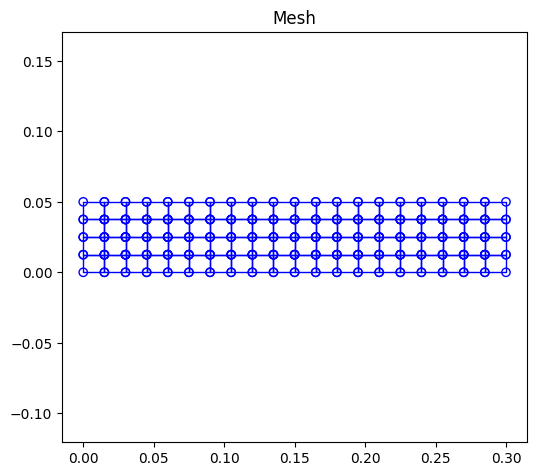

array([ 41,  42,  83,  84, 125, 126, 167, 168, 209, 210], dtype=int32)

Total distributed load: -57.39 N
Point load: -1275.30 N
Total load: -1332.69 N

Maximum displacement: -9.786038e-05 m
Maximum displacement (mm): -0.0979 mm


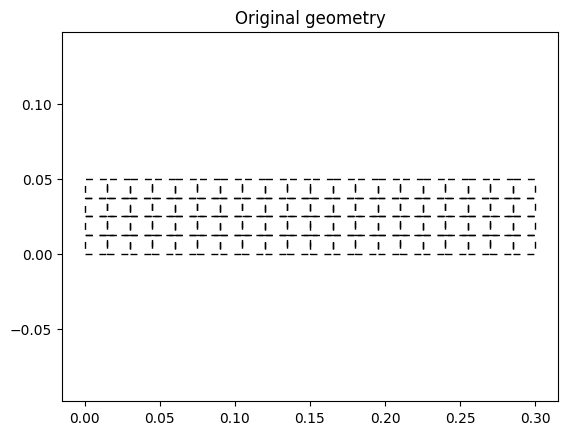

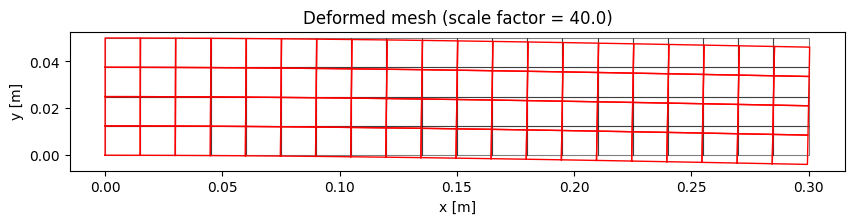

In [47]:
from quadmesh import *
import numpy as np
import calfem.core as cfc
import calfem.vis_mpl as cfv
import matplotlib.pyplot as plt
# Geometry
L1 = 3.0
L2 = 0.3
h = b = 0.05

# Material data
E = 220e9
poisson = 0.3
ptype = 1  # plane stress
ep = [ptype, b]  # [ptype, thickness]
Dmat = cfc.hooke(ptype, E, poisson)

# Physical properties
rho = 7800  # density
g = 9.81
m = 130
A = b * h

# Forces
P = -m * g  # Point load (downward, negative y-direction)
q0 = -h * b * rho * g  # Distributed load per unit length (downward)

# Create mesh
p1 = np.array([0., 0.])  # Lower left corner
p2 = np.array([L2, h])   # Upper right corner
nelx = 20
nely = 4
ndof_per_node = 2
nnode = (nelx + 1) * (nely + 1)
nDofs = ndof_per_node * nnode

# Generate mesh
Ex, Ey, Edof, B1, B2, B3, B4, P1, P2, P3, P4 = quadmesh(p1, p2, nelx, nely, ndof_per_node)

display('Ex', Ex)
display('Ey', Ey)

# Plot mesh
cfv.figure()
cfv.eldraw2(Ex, Ey)
cfv.title('Mesh')
cfv.show()

display(B2)


# Initialize global stiffness matrix and force vector
K = np.zeros([nDofs, nDofs])
f = np.zeros([nDofs, 1])

# Assemble stiffness matrix
for eltopo, elx, ely in zip(Edof, Ex, Ey):
    Ke = cfc.planqe(elx, ely, ep, Dmat)
    cfc.assem(eltopo, K, Ke)

# Apply distributed load on top edge (B3)
# For a uniformly distributed load on a line element, the equivalent nodal forces
# are q*L/2 at each node (where L is the length of the edge)

# Find which elements have their top edge on B3
# Top edge elements are those in the top row (last nely row)
top_elements = range(nelx * (nely - 1), nelx * nely)


# --- Apply distributed load along the TOP edge (downwards) ---
top_elements = range(nelx * (nely - 1), nelx * nely)

for el_idx in top_elements:
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    eltopo = Edof[el_idx, :]

    # Top edge connects nodes 3 and 4
    edge_length = np.sqrt((elx[2] - elx[3])**2 + (ely[2] - ely[3])**2)

    # Equivalent nodal forces for uniform distributed load q0
    nodal_force = q0 * edge_length / 2.0

    # Apply to Y-DOFs (downward load)
    f[eltopo[5] - 1] += nodal_force  # node 3 (top-right)
    f[eltopo[7] - 1] += nodal_force  # node 4 (top-left)


# --- Apply distributed load along the RIGHT edge (downwards) ---
right_elements = range(nelx - 1, nelx * nely, nelx)

# Distributed load intensity along right edge:
q_right = P / h   # [N/m] – since P is a total force, divide by height h

for el_idx in right_elements:
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    eltopo = Edof[el_idx, :]

    # Right edge connects nodes 2 and 3
    edge_length = np.sqrt((elx[1] - elx[2])**2 + (ely[1] - ely[2])**2)

    # Equivalent nodal forces for uniform distributed load q_right
    nodal_force = q_right * edge_length / 2.0

    # Apply to Y-DOFs of right-edge nodes (downwards)
    f[eltopo[3] - 1] += nodal_force  # node 2 (bottom-right)
    f[eltopo[5] - 1] += nodal_force  # node 3 (top-right)


print(f"Total distributed load: {q0 * L2:.2f} N")
print(f"Point load: {P:.2f} N")
print(f"Total load: {q0 * L2 + P:.2f} N")

# Apply boundary conditions - fixed left edge (B4)
bc = B4
bcval = np.zeros(np.size(bc))

# Solve the system
a, r = cfc.solveq(K, f, bc, bcval)

# Extract displacements
print(f"\nMaximum displacement: {np.min(a):.6e} m")
print(f"Maximum displacement (mm): {np.min(a)*1000:.4f} mm")

Ed = cfc.extract_eldisp(Edof, a)

# Deformations
plt.figure()
plotpar = [2, 1, 0]  # Plotting parameters
cfv.eldraw2(Ex, Ey, plotpar)  # Drawing the original geometry
plt.title('Original geometry')
# Drawing the deformed structure
#sfac = cfv.scalfact2(Ex[2, :], Ey[2, :], Ed[2, :], 1)
#plotpar = [1, 2, 1]
#sfac = 40  # Scaling factor to see the actual deformations
#cfv.eldisp2(Ex, Ey, Ed, plotpar, sfac)
#plt.title('Displacement')

# -------------------------------
# Plot undeformed and deformed mesh manually
# -------------------------------

# Compute nodal coordinates
xv = np.linspace(p1[0], p2[0], nelx + 1)
yv = np.linspace(p1[1], p2[1], nely + 1)
coords = np.array([[x, y] for y in yv for x in xv])  # (N, 2) array

# Deformed coordinates
U = a[0::2].reshape(-1, 1)  # x-displacements
V = a[1::2].reshape(-1, 1)  # y-displacements

sfac = 40  # deformation scale
coords_def = coords + sfac * np.hstack([U, V])

# Plot
plt.figure(figsize=(10, 3))
for elx, ely in zip(Ex, Ey):
    # Undeformed
    plt.plot(np.append(elx, elx[0]), np.append(ely, ely[0]), 'k-', lw=0.8, alpha=0.5)

for e, (elx, ely) in enumerate(zip(Ex, Ey)):
    # Get the deformed coordinates for each element
    nodes = ((Edof[e, ::ndof_per_node] - 1) // ndof_per_node).astype(int)
    x_def = coords_def[nodes, 0]
    y_def = coords_def[nodes, 1]
    plt.plot(np.append(x_def, x_def[0]), np.append(y_def, y_def[0]), 'r-', lw=1.0)

plt.gca().set_aspect('equal')
plt.title(f"Deformed mesh (scale factor = {sfac:.1f})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()


## Calfem with length 0.3m actual backp

In [ ]:
from quadmesh import *
import numpy as np
import calfem.core as cfc
import calfem.vis_mpl as cfv
import matplotlib.pyplot as plt
# Geometry
L1 = 3.0
L2 = 0.3
h = b = 0.05

# Material data
E = 220e9
poisson = 0.3
ptype = 1  # plane stress
ep = [ptype, b]  # [ptype, thickness]
Dmat = cfc.hooke(ptype, E, poisson)

# Physical properties
rho = 7800  # density
g = 9.81
m = 130
A = b * h

# Forces
P = -m * g  # Point load (downward, negative y-direction)
q0 = -h * b * rho * g  # Distributed load per unit length (downward)

# Create mesh
p1 = np.array([0., 0.])  # Lower left corner
p2 = np.array([L2, h])   # Upper right corner
nelx = 20
nely = 4
ndof_per_node = 2
nnode = (nelx + 1) * (nely + 1)
nDofs = ndof_per_node * nnode

# Generate mesh
Ex, Ey, Edof, B1, B2, B3, B4, P1, P2, P3, P4 = quadmesh(p1, p2, nelx, nely, ndof_per_node)

display('Ex', Ex)
display('Ey', Ey)

# Plot mesh
cfv.figure()
cfv.eldraw2(Ex, Ey)
cfv.title('Mesh')
cfv.show()

display(B2)


# Initialize global stiffness matrix and force vector
K = np.zeros([nDofs, nDofs])
f = np.zeros([nDofs, 1])

# Assemble stiffness matrix
for eltopo, elx, ely in zip(Edof, Ex, Ey):
    Ke = cfc.planqe(elx, ely, ep, Dmat)
    cfc.assem(eltopo, K, Ke)

# Apply distributed load on top edge (B3)
# For a uniformly distributed load on a line element, the equivalent nodal forces
# are q*L/2 at each node (where L is the length of the edge)

# Find which elements have their top edge on B3
# Top edge elements are those in the top row (last nely row)
top_elements = range(nelx * (nely - 1), nelx * nely)


for el_idx in top_elements:
    # Get element coordinates
    elx = Ex[el_idx, :]
    ely = Ey[el_idx, :]
    
    # Get element topology
    eltopo = Edof[el_idx, :]
    
    # For a quad element, the top edge connects nodes at indices 2 and 3
    # Calculate edge length
    #edge_length = np.sqrt((elx[2] - elx[3])**2 + (ely[2] - ely[3])**2)
    L = np.hypot(elx[2] - elx[3], ely[2] - ely[3])

    # Equivalent nodal forces for uniform distributed load
    # For a uniformly distributed load q over length L:
    # Each node gets q*L/2
    nodal_force = q0 * L / 2.0
    
    # Apply to the y-DOFs of nodes 3 and 4 (indices 4,5,6,7 in eltopo)
    # Node 3 (top-right): eltopo[4] = x-dof, eltopo[5] = y-dof
    # Node 4 (top-left): eltopo[6] = x-dof, eltopo[7] = y-dof
    f[eltopo[5] - 1] += nodal_force  # y-DOF of node 3 (0-indexed)
    f[eltopo[7] - 1] += nodal_force  # y-DOF of node 4 (0-indexed)

# Apply point load P at top right corner (P3)
# P3 contains the DOFs of the top-right corner node
#f[P3[1] - 1] += P  # y-direction DOF (subtract 1 for 0-indexing)
f[B2[0]] += P


print(f"Total distributed load: {q0 * L1:.2f} N")
print(f"Point load: {P:.2f} N")
print(f"Total load: {q0 * L1 + P:.2f} N")

# Apply boundary conditions - fixed left edge (B4)
bc = B4
bcval = np.zeros(np.size(bc))

# Solve the system
a, r = cfc.solveq(K, f, bc, bcval)

# Extract displacements
print(f"\nMaximum displacement: {np.min(a):.6e} m")
print(f"Maximum displacement (mm): {np.min(a)*1000:.4f} mm")

Ed = cfc.extract_eldisp(Edof, a)

# Deformations
plt.figure()
plotpar = [2, 1, 0]  # Plotting parameters
cfv.eldraw2(Ex, Ey, plotpar)  # Drawing the original geometry
plt.title('Original geometry')
# Drawing the deformed structure
#sfac = cfv.scalfact2(Ex[2, :], Ey[2, :], Ed[2, :], 1)
#plotpar = [1, 2, 1]
#sfac = 40  # Scaling factor to see the actual deformations
#cfv.eldisp2(Ex, Ey, Ed, plotpar, sfac)
#plt.title('Displacement')

# -------------------------------
# Plot undeformed and deformed mesh manually
# -------------------------------

# Compute nodal coordinates
xv = np.linspace(p1[0], p2[0], nelx + 1)
yv = np.linspace(p1[1], p2[1], nely + 1)
coords = np.array([[x, y] for y in yv for x in xv])  # (N, 2) array

# Deformed coordinates
U = a[0::2].reshape(-1, 1)  # x-displacements
V = a[1::2].reshape(-1, 1)  # y-displacements

sfac = 40  # deformation scale
coords_def = coords + sfac * np.hstack([U, V])

# Plot
plt.figure(figsize=(10, 3))
for elx, ely in zip(Ex, Ey):
    # Undeformed
    plt.plot(np.append(elx, elx[0]), np.append(ely, ely[0]), 'k-', lw=0.8, alpha=0.5)

for e, (elx, ely) in enumerate(zip(Ex, Ey)):
    # Get the deformed coordinates for each element
    nodes = ((Edof[e, ::ndof_per_node] - 1) // ndof_per_node).astype(int)
    x_def = coords_def[nodes, 0]
    y_def = coords_def[nodes, 1]
    plt.plot(np.append(x_def, x_def[0]), np.append(y_def, y_def[0]), 'r-', lw=1.0)

plt.gca().set_aspect('equal')
plt.title(f"Deformed mesh (scale factor = {sfac:.1f})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()


## Assignment 2 calfem

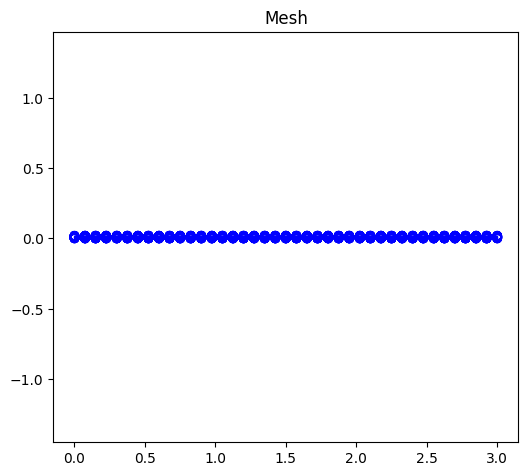

Total distributed load per unit length q0 = -120000000.00 N/m

Maximum displacement: -7.193960e-03 m
Maximum displacement (mm): -7.1940 mm


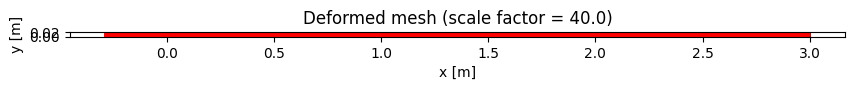

In [48]:
from quadmesh import *
import numpy as np
import calfem.core as cfc
import calfem.vis_mpl as cfv
import matplotlib.pyplot as plt

# Geometry
L = 3.0
h = 0.02
b = 0.25

# Material data
E = 200e9
poisson = 0.3
ptype = 1  # plane stress
ep = [ptype, b]  # [ptype, thickness]
Dmat = cfc.hooke(ptype, E, poisson)

# Physical properties
rho = 7800  # density
g = 9.81
A = b * h

# Distributed load (self-weight, downward)
q0 = -120e6  # [N/m]

# Mesh
p1 = np.array([0., 0.])     # Lower left corner
p2 = np.array([L, h])       # Upper right corner
nelx = 40                   # number of elements along length
nely = 20                    # number of elements through height
ndof_per_node = 2
nnode = (nelx + 1) * (nely + 1)
nDofs = ndof_per_node * nnode

# Generate mesh
Ex, Ey, Edof, B1, B2, B3, B4, P1, P2, P3, P4 = quadmesh(p1, p2, nelx, nely, ndof_per_node)

# Compute nodal coordinates (same logic as used for plotting)
xv = np.linspace(p1[0], p2[0], nelx + 1)
yv = np.linspace(p1[1], p2[1], nely + 1)
coords = np.array([[x, y] for y in yv for x in xv])  # (N, 2) array of nodal coordinates

# Plot mesh
cfv.figure()
cfv.eldraw2(Ex, Ey)
cfv.title('Mesh')
cfv.show()

# Initialize global stiffness matrix and force vector
K = np.zeros([nDofs, nDofs])
f = np.zeros([nDofs, 1])

# Assemble stiffness matrix
for eltopo, elx, ely in zip(Edof, Ex, Ey):
    Ke = cfc.planqe(elx, ely, ep, Dmat)
    cfc.assem(eltopo, K, Ke)

# --- Apply distributed load on the left edge (B4) ---
# Each element edge between two adjacent nodes gets q*L/2 at each node
# --- Apply distributed load on the LEFT edge (B4) ---
# q0 acts vertically downward
# --- Apply distributed load on LEFT edge (B4), acting to the RIGHT (+x) ---
for i in range((len(B4)//2) - 1):
    x1_dof = B4[2*i]       # x-DOF of lower node
    x2_dof = B4[2*(i+1)]   # x-DOF of upper node

    # Convert DOF indices to node indices
    node1 = (x1_dof - 1) // 2
    node2 = (x2_dof - 1) // 2

    # Get nodal coordinates
    y1 = coords[node1, 1]
    y2 = coords[node2, 1]

    # Edge length (vertical distance)
    Le = abs(y2 - y1)

    # Equivalent nodal forces in +x direction (horizontal)
    f[x1_dof - 1] += q0 * Le / 2.0
    f[x2_dof - 1] += q0 * Le / 2.0

print(f"Total distributed load per unit length q0 = {q0:.2f} N/m")

# --- Apply boundary conditions: clamp RIGHT edge (B2) ---
bc = B2
bcval = np.zeros(np.size(bc))

# Solve
a, r = cfc.solveq(K, f, bc, bcval)

# --- Results ---
print(f"\nMaximum displacement: {np.min(a):.6e} m")
print(f"Maximum displacement (mm): {np.min(a)*1e3:.4f} mm")

Ed = cfc.extract_eldisp(Edof, a)

# -------------------------------
# Plot undeformed and deformed mesh manually
# -------------------------------
# Nodal coordinates
xv = np.linspace(p1[0], p2[0], nelx + 1)
yv = np.linspace(p1[1], p2[1], nely + 1)
coords = np.array([[x, y] for y in yv for x in xv])  # (N, 2)

# Deformed coordinates
U = a[0::2].reshape(-1, 1)
V = a[1::2].reshape(-1, 1)
sfac = 40
coords_def = coords + sfac * np.hstack([U, V])

# Plot
plt.figure(figsize=(10, 3))
for elx, ely in zip(Ex, Ey):
    plt.plot(np.append(elx, elx[0]), np.append(ely, ely[0]), 'k-', lw=0.6)

for e, (elx, ely) in enumerate(zip(Ex, Ey)):
    nodes = ((Edof[e, ::ndof_per_node] - 1) // ndof_per_node).astype(int)
    x_def = coords_def[nodes, 0]
    y_def = coords_def[nodes, 1]
    plt.plot(np.append(x_def, x_def[0]), np.append(y_def, y_def[0]), 'r-', lw=1.0)

plt.gca().set_aspect('equal')
plt.title(f"Deformed mesh (scale factor = {sfac:.1f})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show()

## Assignment 2 attempt 3 using own mesh varying area

array([0.15      , 0.16666667, 0.18333333, 0.2       , 0.21666667,
       0.23333333, 0.25      ])

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6],
       [6, 7]])

K shape: (7, 7)
h_e ()
r_mean ()
h_e ()
r_mean ()
h_e ()
r_mean ()
h_e ()
r_mean ()
h_e ()
r_mean ()
h_e ()
r_mean ()


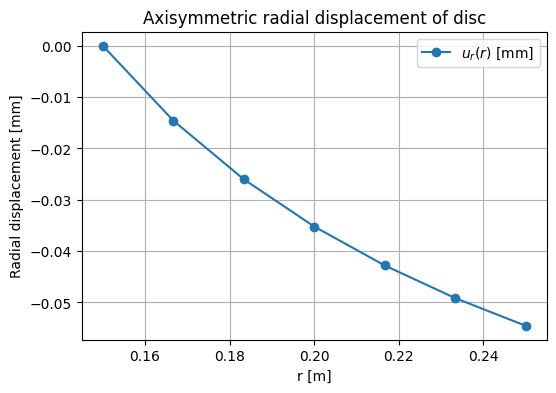

Node 1: r = 0.1500 m, ur = 0.000 μm
Node 2: r = 0.1667 m, ur = -14.575 μm
Node 3: r = 0.1833 m, ur = -26.003 μm
Node 4: r = 0.2000 m, ur = -35.211 μm
Node 5: r = 0.2167 m, ur = -42.790 μm
Node 6: r = 0.2333 m, ur = -49.139 μm
Node 7: r = 0.2500 m, ur = -54.536 μm


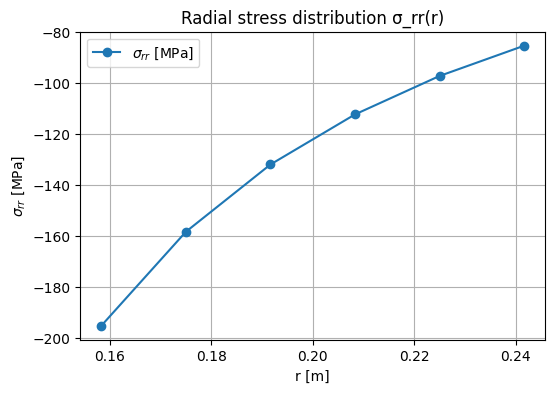

In [ ]:
import numpy as np
import calfem.core as cfc
import matplotlib.pyplot as plt
from scipy import integrate

b_outer = 0.25
nu=0.3
E=200e9
h0 = 0.02
Width = b
num_el = 6
nnodes = num_el + 1
a_inner = 0.15

coords = np.linspace(a_inner, b_outer, nnodes)

display(coords)
#coords = coords.reshape(-1,1)

Edof = np.zeros((num_el, 2), dtype=int)
for i in range(num_el):
    Edof[i, 0] = i + 1       # First column
    Edof[i, 1] = i + 2       # Second column

#display(coords)
display(Edof)

num_dofs = np.max(Edof)

#Dmat = E / (1-nu**2) * np.array([[1, nu],
                                 #[nu,1]])

num_dofs = np.max(Edof)
K = np.zeros((num_dofs, num_dofs))
f = np.zeros((num_dofs, 1))

print("K shape:", K.shape)

for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    Le = r2 - r1
    r_mean = 0.5 * (r1 + r2)
    
    # variable thickness
    h_e = h0 * (r_mean - a_inner) / (b_outer - a_inner) + h0

    print('h_e',np.shape(h_e))
    print('r_mean',np.shape(r_mean))

    # local stiffness (axisymmetric linear element)
    Ke = (2 * np.pi * E * h_e * r_mean / Le) * np.array([[1, -1],
                                                        [-1,  1]])
    cfc.assem(Edof[el, :], K, Ke)

# --- Boundary conditions ---
bc = np.array([1])  # fix outer radius (clamped)
bcVal = np.array([0.0])

# Applying distributed load
sigma_r = -120e6 
r_inner = coords[-1]
h_inner = h0
f[-1, 0] = 2 * np.pi * r_inner * h_inner * sigma_r  # negative radial direction


a, r = cfc.solveq(K, f, bc, bcVal)


plt.figure(figsize=(6,4))
plt.plot(coords, a * 1e3, 'o-', label='$u_r(r)$ [mm]')
plt.xlabel('r [m]')
plt.ylabel('Radial displacement [mm]')
plt.title('Axisymmetric radial displacement of disc')
plt.grid(True)
plt.legend()
plt.show()


for i in range(nnodes):
    print(f"Node {i+1}: r = {coords[i]:.4f} m, ur = {a[i,0]*1e6:.3f} μm")

# Computing normal stress, radial

sigma_rr_vals = np.zeros(num_el)
r_centers = np.zeros(num_el)

for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    Le = r2 - r1
    r_mean = 0.5 * (r1 + r2)
    r_centers[el] = r_mean

    u1 = a[el, 0]
    u2 = a[el + 1, 0]
    du_dr = (u2 - u1) / Le

    # Plane stress approximation
    sigma_rr = E / (1 - nu**2) * (du_dr + nu * (u1 + u2) / (2 * r_mean))
    sigma_rr_vals[el] = sigma_rr

# Plotting radial stress
plt.figure(figsize=(6,4))
plt.plot(r_centers, sigma_rr_vals/1e6, 'o-', label=r'$\sigma_{rr}$ [MPa]')
plt.xlabel('r [m]')
plt.ylabel(r'$\sigma_{rr}$ [MPa]')
plt.title('Radial stress distribution σ_rr(r)')
plt.grid(True)
plt.legend()
plt.show()

## Assignment 2 constant area

array([0.15      , 0.16666667, 0.18333333, 0.2       , 0.21666667,
       0.23333333, 0.25      ])

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6],
       [6, 7]])

K shape: (7, 7)
h_e ()
r_mean ()
h_e ()
r_mean ()
h_e ()
r_mean ()
h_e ()
r_mean ()
h_e ()
r_mean ()
h_e ()
r_mean ()


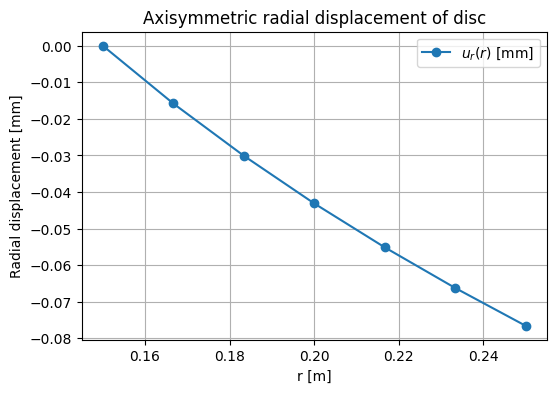

Node 1: r = 0.1500 m, ur = 0.000 μm
Node 2: r = 0.1667 m, ur = -15.789 μm
Node 3: r = 0.1833 m, ur = -30.075 μm
Node 4: r = 0.2000 m, ur = -43.119 μm
Node 5: r = 0.2167 m, ur = -55.119 μm
Node 6: r = 0.2333 m, ur = -66.230 μm
Node 7: r = 0.2500 m, ur = -76.575 μm


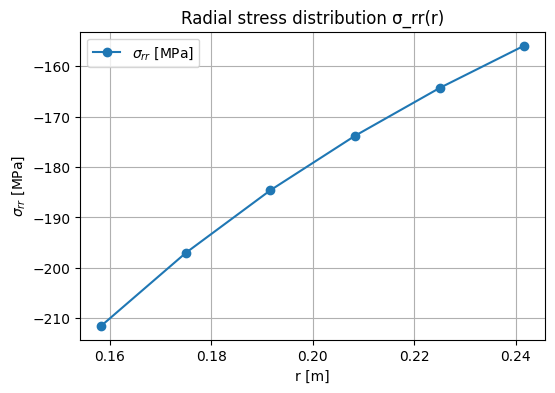

In [40]:
import numpy as np
import calfem.core as cfc
import matplotlib.pyplot as plt
from scipy import integrate

b_outer = 0.25
nu=0.3
E=200e9
h0 = 0.02
Width = b
num_el = 6
nnodes = num_el + 1
a_inner = 0.15

coords = np.linspace(a_inner, b_outer, nnodes)

display(coords)
#coords = coords.reshape(-1,1)

Edof = np.zeros((num_el, 2), dtype=int)
for i in range(num_el):
    Edof[i, 0] = i + 1       # First column
    Edof[i, 1] = i + 2       # Second column

#display(coords)
display(Edof)

num_dofs = np.max(Edof)

#Dmat = E / (1-nu**2) * np.array([[1, nu],
                                 #[nu,1]])

num_dofs = np.max(Edof)
K = np.zeros((num_dofs, num_dofs))
f = np.zeros((num_dofs, 1))

print("K shape:", K.shape)

for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    Le = r2 - r1
    r_mean = 0.5 * (r1 + r2)
    
    # variable thickness
    h_e = h0

    print('h_e',np.shape(h_e))
    print('r_mean',np.shape(r_mean))

    # local stiffness (axisymmetric linear element)
    Ke = (2 * np.pi * E * h_e * r_mean / Le) * np.array([[1, -1],
                                                        [-1,  1]])
    cfc.assem(Edof[el, :], K, Ke)

# --- Boundary conditions ---
bc = np.array([1])  # fix outer radius (clamped)
bcVal = np.array([0.0])

# Applying distributed load
sigma_r = -120e6 
r_inner = coords[-1]
h_inner = h0
f[-1, 0] = 2 * np.pi * r_inner * h_inner * sigma_r  # negative radial direction


a, r = cfc.solveq(K, f, bc, bcVal)


plt.figure(figsize=(6,4))
plt.plot(coords, a * 1e3, 'o-', label='$u_r(r)$ [mm]')
plt.xlabel('r [m]')
plt.ylabel('Radial displacement [mm]')
plt.title('Axisymmetric radial displacement of disc')
plt.grid(True)
plt.legend()
plt.show()


for i in range(nnodes):
    print(f"Node {i+1}: r = {coords[i]:.4f} m, ur = {a[i,0]*1e6:.3f} μm")

# Computing normal stress, radial

sigma_rr_vals = np.zeros(num_el)
r_centers = np.zeros(num_el)

for el in range(num_el):
    r1 = coords[el]
    r2 = coords[el + 1]
    Le = r2 - r1
    r_mean = 0.5 * (r1 + r2)
    r_centers[el] = r_mean

    u1 = a[el, 0]
    u2 = a[el + 1, 0]
    du_dr = (u2 - u1) / Le

    # Plane stress approximation
    sigma_rr = E / (1 - nu**2) * (du_dr + nu * (u1 + u2) / (2 * r_mean))
    sigma_rr_vals[el] = sigma_rr

# Plotting radial stress
plt.figure(figsize=(6,4))
plt.plot(r_centers, sigma_rr_vals/1e6, 'o-', label=r'$\sigma_{rr}$ [MPa]')
plt.xlabel('r [m]')
plt.ylabel(r'$\sigma_{rr}$ [MPa]')
plt.title('Radial stress distribution σ_rr(r)')
plt.grid(True)
plt.legend()
plt.show()